In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
hand = np.array( [ ### CENTRAL AREA: 
## Wrist coordinate: 
[ -0.0900825,
  -0.0353566,
  0.265416
],
## Center coordinate: 
[ -0.0615185,
  -0.00532084,
  0.258636
],
## Wrist thumb coordinate: 
[ -0.0743877,
  -0.034451,
  0.279787
]
,

### THUMB: 
## LowPos coordinate: 
[ -0.0365635,
  -0.038022,
  0.280544
],
## MidPos coordinate: 
[ -0.00442387,
  -0.0424887,
  0.278715
],
## TopPos coordinate: 
[ 0.00850253,
  -0.0463654,
  0.261594
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ -0.0216816,
  0.0162525,
  0.272753
],
## LowPos coordinate: 
[ 0.0208435,
  0.0250169,
  0.265625
],
## MidPos coordinate: 
[ 0.0304503,
  0.00952647,
  0.253306,
],
## TopPos coordinate: 
[ 0.0391837,
  -0.0045557,
  0.242107
]
,

### FINGER: 
## WristPos coordinate: 
[ -0.0343148,
  0.0232846,
  0.25218
],
## LowPos coordinate: 
[ 0.00537188,
  0.035976,
  0.22835
],
## MidPos coordinate: 
[ 0.0257535,
  0.0264863,
  0.21166,
],
## TopPos coordinate: 
[ 0.0260178,
  0.00726674,
  0.206134
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.0477964,
  0.0258384,
  0.23597
],
## LowPos coordinate: 
[ -0.0152022,
  0.0328505,
  0.208814
],
## MidPos coordinate: 
[ 0.000170641,
  0.0259713,
  0.194659,
],
## TopPos coordinate: 
[ 0.0107491,
  0.0129109,
  0.183818
]
,

### PINKEY: 
## WristPos coordinate: 
[ -0.0688139,
  0.0231569,
  0.218428
],
## LowPos coordinate: 
[ -0.0480963,
  0.0257514,
  0.187882
],
## MidPos coordinate: 
[ -0.0381962,
  0.0178562,
  0.17654,
],
## TopPos coordinate: 
[ -0.0298294,
  0.00908945,
  0.1677
]
,
])

In [3]:
hand_one = np.array(
[ ### CENTRAL AREA: 
    ## Wrist coordinate: 
    [ -0.0587442,
      -0.0575654,
      0.254768
    ],
    ## Center coordinate: 
    [ -0.0554771,
      -0.0158481,
      0.258371
    ],
    ## Wrist thumb coordinate: 
    [ -0.0388026,
      -0.0500843,
      0.254997
    ],
### THUMB: 
    ## LowPos coordinate: 
    [ -0.032924,
      -0.0166904,
      0.237842
    ],
    ## MidPos coordinate: 
    [ -0.036934,
      0.00879019,
      0.218071
    ],
    ## TopPos coordinate: 
    [ -0.0547505,
      0.0165084,
      0.208159
    ],
### INDEX FINGER: 
    ## WristPos coordinate: 
    [ -0.0272847,
      0.0222217,
      0.261117
    ],
    ## LowPos coordinate: 
    [ -0.0283651,
      0.0646959,
      0.272553
    ],
    ## MidPos coordinate: 
    [ -0.0291517,
      0.0826215,
      0.259822,
    ],
    ## TopPos coordinate: 
    [ -0.0298669,
      0.0989175,
      0.24825
    ],
### FINGER: 
    ## WristPos coordinate: 
    [ -0.0523655,
      0.0238828,
      0.261803
    ],
    ## LowPos coordinate: 
    [ -0.0530662,
      0.0402378,
      0.216681
    ],
    ## MidPos coordinate: 
    [ -0.053834,
      0.013319,
      0.209013,
    ],
    ## TopPos coordinate: 
    [ -0.0538215,
      -0.00104651,
      0.222929
    ],
### RING FINGER: 
    ## WristPos coordinate: 
    [ -0.0733711,
      0.0207547,
      0.26198
    ],
    ## LowPos coordinate: 
    [ -0.072614,
      0.0155629,
      0.219301
    ],
    ## MidPos coordinate: 
    [ -0.0686141,
      -0.00587895,
      0.216429,
    ],
    ## TopPos coordinate: 
    [ -0.0662963,
      -0.0178322,
      0.232295
    ],
### PINKEY: 
    ## WristPos coordinate: 
    [ -0.0983671,
      0.00928223,
      0.261507
    ],
    ## LowPos coordinate: 
    [ -0.0908268,
      0.0105776,
      0.225307
    ],
    ## MidPos coordinate: 
    [ -0.0832119,
      -0.00445244,
      0.227567,
    ],
    ## TopPos coordinate: 
    [ -0.0774205,
      -0.0173107,
      0.232679
    ]
])

In [4]:
hand_five = np.array(
[ ### CENTRAL AREA: 
## Wrist coordinate: 
[ 0,
  0,
  0
],
## Center coordinate: 
[ 0,
  0,
  1
],
## Wrist thumb coordinate: 
[ 0.429146,
  8.88178e-16,
  0.151414
]
,

### THUMB: 
## LowPos coordinate: 
[ 1.06725,
  0.0816439,
  0.625135
],
## MidPos coordinate: 
[ 1.59875,
  0.223446,
  1.03044
],
## TopPos coordinate: 
[ 1.86459,
  0.284716,
  1.39872
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ 0.581664,
  -2.35568e-07,
  1.74289
],
## LowPos coordinate: 
[ 0.638849,
  0.00903126,
  2.74915
],
## MidPos coordinate: 
[ 0.667439,
  0.0168282,
  3.25224,
],
## TopPos coordinate: 
[ 0.69343,
  0.0239164,
  3.70959
]
,

### FINGER: 
## WristPos coordinate: 
[ -3.07965e-08,
  -7.45071e-08,
  1.75193
],
## LowPos coordinate: 
[ -0.0965891,
  -0.0858578,
  2.85595
],
## MidPos coordinate: 
[ -0.152813,
  -0.0204339,
  3.49859,
],
## TopPos coordinate: 
[ -0.192973,
  0.0262977,
  3.95762
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.47927,
  1.9942e-07,
  1.64063
],
## LowPos coordinate: 
[ -0.755129,
  -0.0759577,
  2.67015
],
## MidPos coordinate: 
[ -0.89386,
  0.0315657,
  3.1879,
],
## TopPos coordinate: 
[ -1.0147,
  0.201968,
  3.63886
]
,

### PINKEY: 
## WristPos coordinate: 
[ -1.02591,
  3.56395e-07,
  1.31325
],
## LowPos coordinate: 
[ -1.45594,
  -0.0803339,
  2.14447
],
## MidPos coordinate: 
[ -1.65428,
  -0.101727,
  2.52718,
],
## TopPos coordinate: 
[ -1.82957,
  -0.112223,
  2.86507
]
,
]
)

In [5]:
hand_five_friend = np.array( 
[ ### CENTRAL AREA: 
## Wrist coordinate: 
[ 0,
  0,
  0
],
## Center coordinate: 
[ 0,
  -8.88178e-16,
  1
],
## Wrist thumb coordinate: 
[ 0.460588,
  -8.88178e-16,
  0.260078
]
,

### THUMB: 
## LowPos coordinate: 
[ 1.25841,
  0.0387257,
  0.624883
],
## MidPos coordinate: 
[ 1.93553,
  0.129676,
  0.936778
],
## TopPos coordinate: 
[ 2.31229,
  0.13946,
  1.27105
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ 0.582773,
  -6.52564e-07,
  2.05459
],
## LowPos coordinate: 
[ 0.776275,
  -0.161408,
  3.06528
],
## MidPos coordinate: 
[ 0.874046,
  -0.131421,
  3.57595,
],
## TopPos coordinate: 
[ 0.962929,
  -0.104161,
  4.0402
]
,

### FINGER: 
## WristPos coordinate: 
[ 8.47692e-08,
  -4.51261e-07,
  2.03631
],
## LowPos coordinate: 
[ 0.00614324,
  -0.172432,
  3.17329
],
## MidPos coordinate: 
[ 0.00976467,
  -0.200045,
  3.84355,
],
## TopPos coordinate: 
[ 0.0123514,
  -0.219768,
  4.3223
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.479692,
  -6.34962e-07,
  1.92786
],
## LowPos coordinate: 
[ -0.563097,
  -0.163293,
  3.02847
],
## MidPos coordinate: 
[ -0.606192,
  -0.138536,
  3.59717,
],
## TopPos coordinate: 
[ -0.645307,
  -0.10137,
  4.11332
]
,

### PINKEY: 
## WristPos coordinate: 
[ -1.04367,
  -2.4436e-07,
  1.63176
],
## LowPos coordinate: 
[ -1.27924,
  -0.100579,
  2.5646
],
## MidPos coordinate: 
[ -1.38819,
  -0.109476,
  2.99542,
],
## TopPos coordinate: 
[ -1.48432,
  -0.116743,
  3.37556
]
,
])

In [6]:
hand_one_friend = np.array(
 [ ### CENTRAL AREA: 
## Wrist coordinate: 
[ 0,
  0,
  0
],
## Center coordinate: 
[ 0,
  0,
  1
],
## Wrist thumb coordinate: 
[ 0.493709,
  0,
  0.269318
]
,

### THUMB: 
## LowPos coordinate: 
[ 0.365529,
  0.636946,
  0.855961
],
## MidPos coordinate: 
[ 0.0846799,
  1.21558,
  1.23914
],
## TopPos coordinate: 
[ -0.134118,
  1.48915,
  1.59897
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ 0.627987,
  -3.99181e-07,
  2.18211
],
## LowPos coordinate: 
[ 0.588278,
  0.280184,
  3.04482
],
## MidPos coordinate: 
[ 0.570924,
  0.532432,
  3.42186,
],
## TopPos coordinate: 
[ 0.555308,
  0.766856,
  3.76115
]
,

### FINGER: 
## WristPos coordinate: 
[ 6.6481e-07,
  -4.797e-07,
  2.16506
],
## LowPos coordinate: 
[ -1.80676e-05,
  1.0033,
  2.16483
],
## MidPos coordinate: 
[ -0.0480451,
  0.962335,
  1.58299,
],
## TopPos coordinate: 
[ -0.0631134,
  0.586561,
  1.40044
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.51695,
  2.43583e-07,
  2.04802
],
## LowPos coordinate: 
[ -0.482437,
  0.948501,
  1.86762
],
## MidPos coordinate: 
[ -0.390928,
  1.03306,
  1.38928,
],
## TopPos coordinate: 
[ -0.336824,
  0.68808,
  1.10647
]
,

### PINKEY: 
## WristPos coordinate: 
[ -1.12331,
  2.67087e-07,
  1.72613
],
## LowPos coordinate: 
[ -0.850664,
  0.73812,
  1.61139
],
## MidPos coordinate: 
[ -0.630003,
  0.755417,
  1.32071,
],
## TopPos coordinate: 
[ -0.458564,
  0.670373,
  1.06128
]
,
]
)

In [7]:
hand_five_asp = np.array(
[ ### CENTRAL AREA: 
## Wrist coordinate: 
[ 0,
  0,
  0
],
## Center coordinate: 
[ -4.44089e-16,
  0,
  1
],
## Wrist thumb coordinate: 
[ 0.473524,
  0,
  0.273609
]
,

### THUMB: 
## LowPos coordinate: 
[ 1.21959,
  0.00187415,
  0.681527
],
## MidPos coordinate: 
[ 1.85747,
  0.00933972,
  1.03068
],
## TopPos coordinate: 
[ 2.18636,
  0.0993438,
  1.37952
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ 0.597033,
  8.8598e-07,
  2.12585
],
## LowPos coordinate: 
[ 0.811816,
  0.102551,
  3.04518
],
## MidPos coordinate: 
[ 0.918813,
  0.167826,
  3.50316,
],
## TopPos coordinate: 
[ 1.01608,
  0.227167,
  3.9195
]
,

### FINGER: 
## WristPos coordinate: 
[ 2.51955e-07,
  6.92076e-07,
  2.10539
],
## LowPos coordinate: 
[ 0.0230624,
  0.124873,
  3.11933
],
## MidPos coordinate: 
[ 0.0364785,
  0.2098,
  3.70918,
],
## TopPos coordinate: 
[ 0.0460409,
  0.276461,
  4.12959
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.491404,
  3.3152e-07,
  1.99439
],
## LowPos coordinate: 
[ -0.664237,
  0.237403,
  2.93721
],
## MidPos coordinate: 
[ -0.752663,
  0.358864,
  3.41959,
],
## TopPos coordinate: 
[ -0.83305,
  0.469284,
  3.85811
]
,

### PINKEY: 
## WristPos coordinate: 
[ -1.07005,
  4.54975e-07,
  1.69285
],
## LowPos coordinate: 
[ -1.34317,
  -0.0322897,
  2.5211
],
## MidPos coordinate: 
[ -1.46859,
  0.00736814,
  2.89988,
],
## TopPos coordinate: 
[ -1.57913,
  0.0479603,
  3.23351
]
,
])

In [8]:
hand_five_mes = np.array(
 [ ### CENTRAL AREA: 
## Wrist coordinate: 
[ 0,
  0,
  0
],
## Center coordinate: 
[ 1.11022e-16,
  0,
  1
],
## Wrist thumb coordinate: 
[ 0.488139,
  0,
  0.35167
]
,

### THUMB: 
## LowPos coordinate: 
[ 1.13755,
  0.163251,
  0.857939
],
## MidPos coordinate: 
[ 1.71426,
  0.00775331,
  1.25631
],
## TopPos coordinate: 
[ 1.93382,
  0.216585,
  1.63062
]
,

### INDEX FINGER: 
## WristPos coordinate: 
[ 0.595184,
  9.70777e-08,
  2.35505
],
## LowPos coordinate: 
[ 0.861759,
  0.551775,
  3.08746
],
## MidPos coordinate: 
[ 0.939134,
  0.972259,
  3.30004,
],
## TopPos coordinate: 
[ 1.00948,
  1.35452,
  3.4933
]
,

### FINGER: 
## WristPos coordinate: 
[ 3.3078e-08,
  2.2325e-07,
  2.31611
],
## LowPos coordinate: 
[ 0.0341193,
  0.881378,
  2.90353
],
## MidPos coordinate: 
[ 0.0522322,
  1.41483,
  3.21537,
],
## TopPos coordinate: 
[ 0.060767,
  1.83114,
  3.36231
]
,

### RING FINGER: 
## WristPos coordinate: 
[ -0.489634,
  3.63269e-07,
  2.20594
],
## LowPos coordinate: 
[ -0.634425,
  0.763287,
  2.86264
],
## MidPos coordinate: 
[ -0.708471,
  1.15394,
  3.19849,
],
## TopPos coordinate: 
[ -0.775786,
  1.50908,
  3.5038
]
,

### PINKEY: 
## WristPos coordinate: 
[ -1.07484,
  4.72961e-07,
  1.92315
],
## LowPos coordinate: 
[ -1.51582,
  0.166879,
  2.65815
],
## MidPos coordinate: 
[ -1.55976,
  0.562143,
  2.71116,
],
## TopPos coordinate: 
[ -1.59853,
  0.910906,
  2.75793
]
,
])

In [9]:
edges = np.array([
                 [0, 2], [2, 3], [3, 4], [4, 5],        ## thumb
                 [0, 6], [6, 7], [7, 8], [8, 9],        ## index finger
                 [0, 10], [10, 11], [11, 12], [12, 13], ## finger
                 [0, 14], [14, 15], [15, 16], [16, 17], ## ring finger
                 [0, 18], [18, 19], [19, 20], [20, 21]  ## pinkey
])

In [58]:
def my_contour_hand(hand, edges=[]):
    #from mpl_toolkits.mplot3d.art3d import Line3DCollection
    from matplotlib.collections import LineCollection
    fig = plt.figure(figsize=(10, 10))
    #lc = Line3DCollection(hand[edges])
    lc = LineCollection(hand[:,(0, 2)][edges])
    #ax = fig.gca(projection='3d')
    ax = plt.subplot()
    ax.add_collection(lc)
    ax.plot(hand[:,0], hand[:,2], '.r')
    ax.set_xlabel('X', fontsize=16)
    ax.set_ylabel('Y', fontsize=16)
    #ax.set_zlabel('Z', fontsize=16)
    min_ax = min(hand[:,0].min(), hand[:,2].min())
    max_ax = max(hand[:,0].max(), hand[:,2].max())
    ax.set_xlim(hand[:,0].min() - 0.5, hand[:,0].max() + 0.5)
    ax.set_ylim(hand[:,2].min() - 0.5, hand[:,2].max() + 0.5)
    ax.grid()
    #ax.set_zlim(min_ax, max_ax)
    ax.annotate(r"$u_w$", (hand[0][0] + 0.1, hand[0][2] - 0.1), fontsize=22)
    ax.annotate(r"$u_c$", (hand[1][0] + 0.1, hand[1][2] - 0.1), fontsize=22)
    ax.annotate(r"$u_{wc}$", (hand[2][0] + 0.1, hand[2][2] - 0.1), fontsize=22)
    for i in range(3, 6):
        ax.annotate(r"$u_{1%d}$" % (i - 2) , (hand[i][0] + 0.1, hand[i][2] - 0.1), fontsize=22)
        
    for i in range(6, 22):
        num_finger = (i - 2) // 4
        num_fal = (i - 1) % 4 
        num_fal = 4 if num_fal == 0 else num_fal
        ax.annotate(r"$u_{%d%d}$" % (num_finger, num_fal) , (hand[i][0] + 0.1, hand[i][2] - 0.1), fontsize=22)
    plt.savefig('../image/hand.jpeg')
    plt.show()

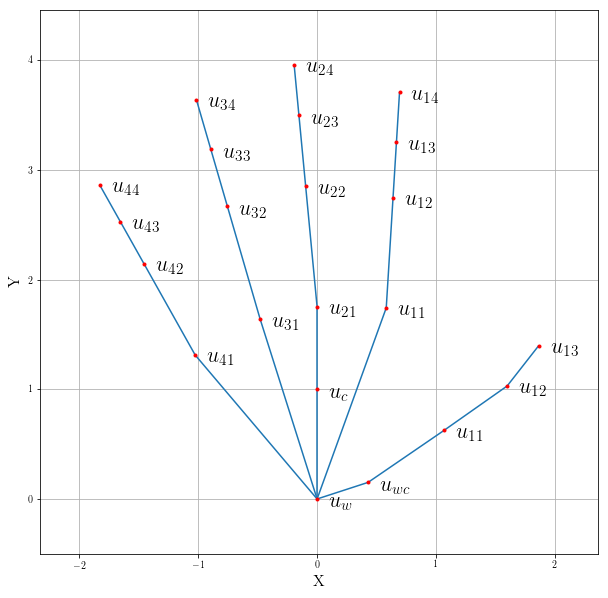

In [59]:
# my_contour_hand(hand, edges)
# my_contour_hand(hand_one, edges)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
my_contour_hand(hand_five, edges)
# my_contour_hand(hand_five_friend, edges)
# my_contour_hand(hand_one_friend, edges)
# my_contour_hand(hand_five_asp, edges)
# my_contour_hand(hand_five_mes, edges)

In [47]:
r't_{}'.format(3)

't_3'